<a href="https://colab.research.google.com/github/whajji1026/Diabetes-data-visualization/blob/main/OCR%20and%20object%20detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



1.   Object Detection
texte en gras



In [30]:
!pip install ultralytics -q
!pip install pyyaml -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 618.9/618.9 kB 6.4 MB/s eta 0:00:00


In [38]:
from ultralytics import YOLO
import yaml
import cv2
from google.colab.patches import cv2_imshow

In [32]:
model = YOLO("yolov8x.pt")

100%|██████████| 131M/131M [00:02<00:00, 62.6MB/s]


In [ ]:
model.predict("/content/Study-Space.jpg" , save = True , save_txt = True)

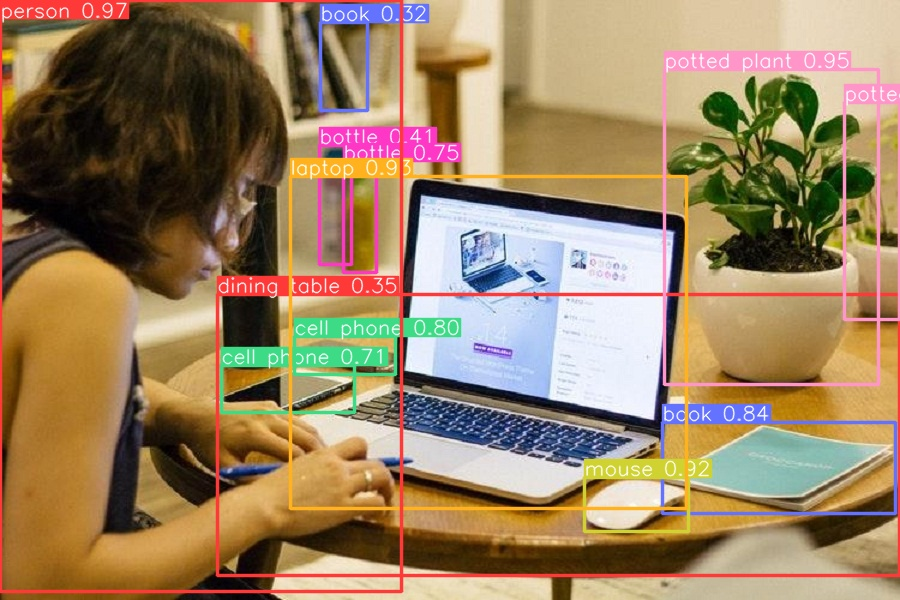

In [41]:
result_image = cv2.imread("/content/runs/detect/predict/Study-Space.jpg")
cv2_imshow( result_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
!yolo detect predict model="yolov8x.pt" source="/content/bikes.mp4"

In [ ]:
!ffmpeg -i {"/content/runs/detect/predict2/bikes.avi"} -vcodec libx264 {"result.mp4"}

In [ ]:
result_video_path = "/content/result.mp4"
cap = cv2.VideoCapture(result_video_path)
while True:
    ret, frame = cap.read()
    if not ret:
        break
    cv2_imshow(frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()




2.   Optical Character Recognition OCR



In [47]:
!pip install torch torchvision torchaudio
!pip install easyocr

In [5]:
!pip install pyspellchecker


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 20.7 MB/s eta 0:00:00


In [6]:
import easyocr
import cv2
from matplotlib import pyplot as plt
import numpy as np


In [23]:
img_path="/content/ur,pet_blanket_small_flatlay_srp,square,1000x1000.jpg"
reader = easyocr.Reader(['en'])
result = reader.readtext(img_path)
result

[([[360, 295], [657, 295], [657, 352], [360, 352]],
  'TO BEAR TRIALS',
  0.7501055325329387),
 ([[327, 355], [690, 355], [690, 412], [327, 412]],
  'WITH A CALM MIND',
  0.8612320149430157),
 ([[327, 415], [689, 415], [689, 475], [327, 475]],
  'ROBS MISFORTUNE',
  0.9623155714425661),
 ([[343, 477], [669, 477], [669, 537], [343, 537]],
  'OF ITS STRENGTH',
  0.8301932670916784),
 ([[380, 540], [628, 540], [628, 596], [380, 596]],
  'AND BURDEN',
  0.953976713197347),
 ([[426, 661], [574, 661], [574, 717], [426, 717]],
  'SENECA',
  0.9998920553097312)]

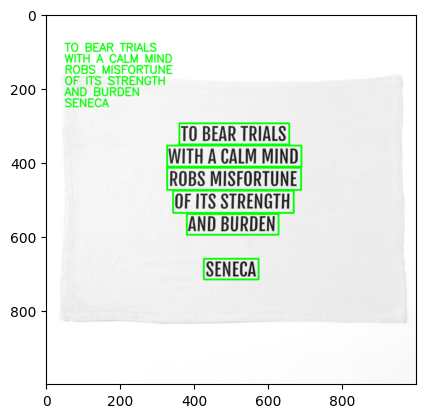

In [29]:
img = cv2.imread(img_path)

font = cv2.FONT_HERSHEY_SIMPLEX

spacer = 100
for detection in result:
    top_left = tuple(detection[0][0])
    bottom_right = tuple(detection[0][2])
    text = detection[1]
    img = cv2.rectangle(img,top_left,bottom_right,(0,255,0),3)
    img = cv2.putText(img,text,(50,spacer), font, 1,(0,255,0),2,cv2.LINE_AA)
    spacer+=30

plt.imshow(img)
plt.show()